## 머신러닝 학습 환경

In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 머신러닝 패키지 추가
import statsmodels.api as sm
import sklearn as sk


In [4]:
# 한글 폰트, 마이너스 
from matplotlib import font_manager,rc
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
plt.rcParams['axes.unicode_minus'] = False
rc('font',family=font) 

## 마켓에서 판매할 생선 종류
- Bream : 도미
- Roach : 유럽잉어
- Whitefish : 송어
- Parkki : 곤들매기 / Abramis bjoerkna
- Perch : 농어
- Pike : 강꼬치고기
- Smelt : 빙어

https://gist.github.com/rickiepark

### 도미 데이터

In [ ]:

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

#### 산점도 ( Scatter Plot )
도미의 길이당 무게의 상관관계

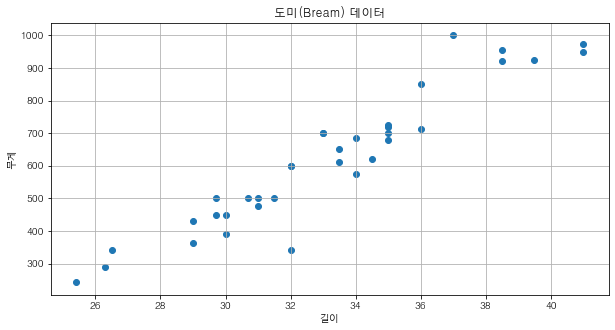

In [8]:
plt.figure(figsize=(10,5)) # 차트크기 지정
plt.scatter(x=bream_length,y=bream_weight)
plt.title('도미(Bream) 데이터')
plt.xlabel('길이')
plt.ylabel('무게')
plt.grid()
plt.show()

### 빙어 데이터

In [9]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

#### 산점도 ( Scatter Plot )
빙어와 도미 길이당 무게의 상관관계

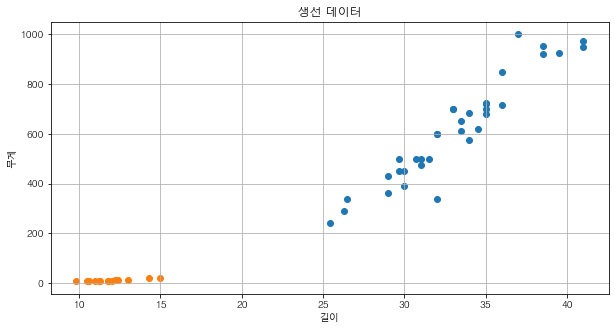

In [10]:
plt.figure(figsize=(10,5)) # 차트크기 지정
plt.scatter(x=bream_length,y=bream_weight)
plt.scatter(x=smelt_length,y=smelt_weight)
plt.title('생선 데이터')
plt.xlabel('길이')
plt.ylabel('무게')
plt.grid()
plt.show()

## 머신러닝 시작

k-최근접 이웃 알고리즘 KNN(K-Nearst Neighbors)

도미 / 빙어 데이터 결합

In [11]:
fish_length = bream_length+smelt_length
fish_weight = bream_weight+smelt_weight

In [12]:
type(fish_length)

list

#### 1차원 리스트 2개 -> 2차원 리스트 변경

In [14]:
fish_data = [[l,w]for l,w in zip(fish_length,fish_weight)]

fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [15]:
# 판다스 데이터 프레임
df = pd.DataFrame(fish_data)
df.head(2)

,0,1
0,25.4,242.0
1,26.3,290.0


In [16]:
# numpy 사용해도 무방
df.to_numpy()

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


#### 데이터프레임으로 seaborn에서 산점도 그릴 수 있음

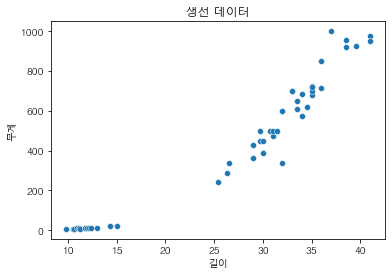

In [17]:
ax = sns.scatterplot(data=df,x=0,y=1)
plt.title('생선 데이터')
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

#### 최근접 알고리즘

##### 머신러닝
- 데이터 (특징) > 길이, 무게
- 타겟값

In [18]:
fish_target = [1]*35+[0]*14 # 1은 Bream 도미, 0은 Smelt 빙어
print(fish_target) 

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


#### 사이킷런 k-최근접 이웃 알고리즘 클래스
KNeighborsClassifier import

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:

kn = KNeighborsClassifier()
kn.fit(X=fish_data,y=fish_target) # 훈련

KNeighborsClassifier()

In [22]:
kn.score(X=fish_data,y=fish_target)

1.0

#### KNN 재확인

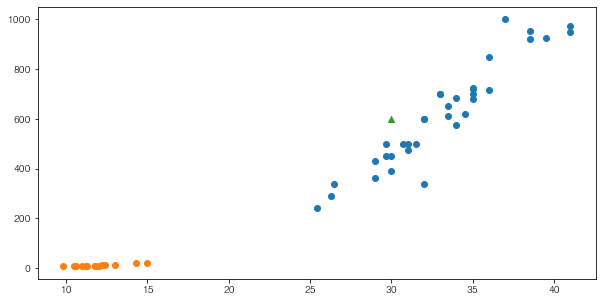

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(x=bream_length,y=bream_weight)
plt.scatter(x=smelt_length,y=smelt_weight)
# 의문의 물고기를 하나 추가
plt.scatter(x=30.0,y=600.0,marker='^')
plt.show()

In [28]:
kn.predict([[30,600]])
# 1 = 도미, 0 = 빙어

array([1])

In [31]:
print(kn._fit_X) # 훈련한 생성 데이터가 그대로들어 있음

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [33]:
print(kn._y) # 훈련한 타겟값 그대로

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


#### K-최근접 이웃 알고리즘
최근접 기본 갯수 5개

최근접값 쓸 파라미터를 40개


In [34]:
kn40 = KNeighborsClassifier(n_neighbors=40)

In [35]:
kn40.fit(fish_data,fish_target)

KNeighborsClassifier(n_neighbors=40)

In [38]:
kn40.score(fish_data,fish_target)

# 이웃으로 하는 값의 양을 늘리면 정확도가 떨어진다

0.7142857142857143